In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('UnitedStates_COVID_19_dataset.csv',parse_dates=['Last_Update'])
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
df.shape

(58, 18)

In [4]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [5]:
df.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [6]:
#seprate the categorical columns and numerical columns
cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df >>> \n',cat_df,'\nnum_df >>> \n',num_df)

cat_df >>> 
 ['Province_State', 'Country_Region', 'ISO3'] 
num_df >>> 
 ['Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

Finding:
    1. Dataset having 58 rows with 18 features.
    2. Missing value present in many features.
    3. No missing values in Province_State, Country_Region, Last_Update, Confirmed, Deaths, Active, FIPS, UID, ISO3.
    4. 4 object type data type and other eihtger numeric or float datatype.

In [8]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

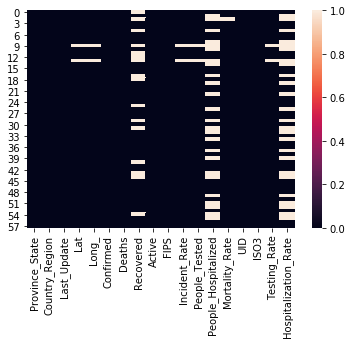

In [9]:
sns.heatmap(df.isnull())
plt.show()

Finding:
    1.Missing value present in numeric columns than fill with mean or median after smmary statistics of numerical features.

### Summary Statisics of Numerical feature

In [10]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Observation:
    1. Mean is greater than median in all features means all data are right skewd in all numerical feature.
    2. Min values for Deaths and Active are zero means cities that have not been affected by the pandemic.
    3. Lat and Long_ consists of -ve values.
    4. Difference between 75 % and max is very large means outliers present.

In [11]:
#ALL numerical columns missing value fillup by mean 
df['Lat'].fillna(df['Lat'].mean(),inplace=True)
df['Long_'].fillna(df['Long_'].mean(),inplace=True)

df['Recovered'].fillna(df['Recovered'].mean(),inplace=True)
df['People_Tested'].fillna(df['People_Tested'].mean(),inplace=True)

df['People_Hospitalized'].fillna(df['People_Hospitalized'].mean(),inplace=True)
df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean(),inplace=True)

df['Testing_Rate'].fillna(df['Testing_Rate'].mean(),inplace=True)
df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean(),inplace=True)
df['Incident_Rate'].fillna(df['Incident_Rate'].mean(),inplace=True)

In [12]:
#After fillup missing value check again
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

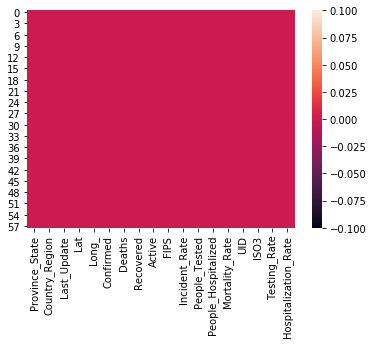

In [13]:
sns.heatmap(df.isnull())
plt.show()

In [14]:
#check coorelation
df.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,0.309579,-6.625465e-02
Long_,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,0.190191,7.138145e-02
Confirmed,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,0.332464,2.874708e-01
Deaths,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,0.344465,2.982254e-01
Recovered,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,0.220597,2.316917e-01
Active,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,0.321395,2.845637e-01
FIPS,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,-0.000100,-1.176128e-04
Incident_Rate,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,0.620621,1.960289e-01
People_Tested,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.220200,2.356350e-01,0.230753,2.526802e-01
People_Hospitalized,0.026456,0.079677,0.869267,0.908279,0.761829,0.835938,0.000009,0.551076,0.642091,1.000000e+00,0.334335,6.697668e-09,0.270255,3.775863e-01


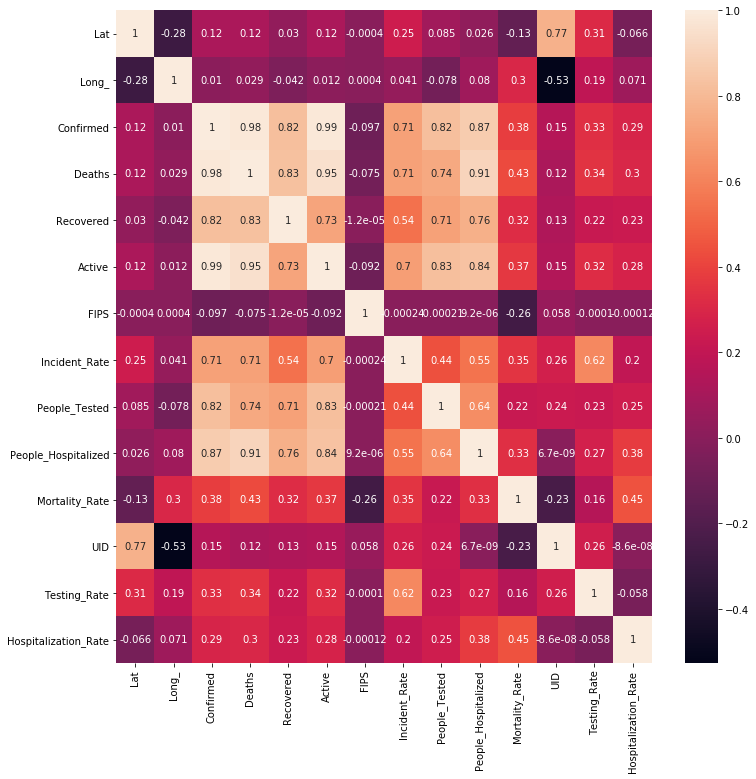

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

Observation:
    1. Most features are highly correlated.
    2. FIPS is the least correlated feature

### Exploring data variable

In [16]:
#Exploring the data variable
for i in df:
    print(i,'\n',df[i].unique(),'\n\n')

Province_State 
 ['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming'] 


Country_Region 
 ['US'] 


Last_Update 
 ['2020-05-21T02:32:54.000000000'] 


Lat 
 [ 32.3182      61.3707     -14.271       33.7298      34.9697
  36.1162      39.0598      41.5978      39.3185      36.84008929
  38.8974      27.7663      33.0406      13

In [17]:
#Dropping Country_Region and Last_Update as they have only one value
df.drop(columns=['Country_Region', 'Last_Update'], axis=1, inplace=True)

In [18]:
df.sort_values(by='Confirmed', ascending=False).head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
36,New York,42.1657,-74.9481,354370,28636,61886.000000,263848.0,36,1821.620216,1505836.0,76410.000000,8.080819,84000036,USA,7740.670204,21.562209
34,New Jersey,40.2989,-74.5210,150776,10749,23945.000000,116082.0,34,1697.509285,531343.0,4897.454545,7.129119,84000034,USA,5982.117023,14.342541
17,Illinois,40.3495,-88.9861,100418,4525,7007.428571,95893.0,17,792.451219,642713.0,4897.454545,4.506164,84000017,USA,5071.986102,14.342541
25,Massachusetts,42.2302,-71.5301,88970,6066,7007.428571,82904.0,25,1290.822797,489953.0,8897.000000,6.818029,84000025,USA,7108.491647,10.000000
5,California,36.1162,-119.6816,85997,3497,7007.428571,82500.0,6,217.646575,1380120.0,4897.454545,4.066421,84000006,USA,3492.893832,14.342541
43,Pennsylvania,40.5908,-77.2098,68126,4770,7007.428571,63356.0,42,532.151684,349700.0,4897.454545,7.001732,84000042,USA,2731.606784,14.342541
26,Michigan,43.3266,-84.5361,53009,5060,28234.000000,19715.0,26,530.787614,437072.0,4897.454545,9.545549,84000026,USA,4376.471997,14.342541
49,Texas,31.0545,-97.5635,51673,1426,30341.000000,19906.0,48,178.208070,770241.0,4897.454545,2.759662,84000048,USA,2656.380746,14.342541
11,Florida,27.7663,-81.6868,47471,2096,7007.428571,45375.0,12,221.024217,771348.0,8934.000000,4.415327,84000012,USA,3591.383953,18.819911
24,Maryland,39.0639,-76.8021,42323,2123,2993.000000,37207.0,24,700.053592,215330.0,7393.000000,5.016185,84000024,USA,3561.716796,17.468043


In [19]:
#Checking the country where maximum confirmed cases are present

most_affected_province=df.groupby(by='Province_State')['Confirmed'].sum().sort_values(ascending=False).reset_index()
most_affected_province

,Province_State,Confirmed
0,New York,354370
1,New Jersey,150776
2,Illinois,100418
3,Massachusetts,88970
4,California,85997
5,Pennsylvania,68126
6,Michigan,53009
7,Texas,51673
8,Florida,47471
9,Maryland,42323


Finding:
    1. Above 1lak confirm cases ony three state newyark,new jersey and Illinois.
    2. Above 50000 confirm cases in 7 state and these are most affected.
    3. In American Samoa confirm cases are 0.

In [20]:
#Checking the Province_State where maximum death cases are present

most_death=df.groupby(by='Province_State')['Deaths'].sum().sort_values(ascending=False).reset_index()
most_death

,Province_State,Deaths
0,New York,28636
1,New Jersey,10749
2,Massachusetts,6066
3,Michigan,5060
4,Pennsylvania,4770
5,Illinois,4525
6,Connecticut,3529
7,California,3497
8,Louisiana,2608
9,Maryland,2123


Finding:
    1. most deaths New yark and new jearsey more tthan 10000.
    2. In Illinois confirm cases more but death nor more with respect confirm cases or other state where cses are minimum 
    but deaths are more .
    3. In 2 state deaths is 0 in Diamond Princess confirm cases present but not deaths in this state.
    3. More than 5000 deats only 4 state.

In [21]:
df.sort_values(by='Recovered', ascending=False).head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
36,New York,42.1657,-74.9481,354370,28636,61886.0,263848.0,36,1821.620216,1505836.0,76410.000000,8.080819,84000036,USA,7740.670204,21.562209
49,Texas,31.0545,-97.5635,51673,1426,30341.0,19906.0,48,178.208070,770241.0,4897.454545,2.759662,84000048,USA,2656.380746,14.342541
26,Michigan,43.3266,-84.5361,53009,5060,28234.0,19715.0,26,530.787614,437072.0,4897.454545,9.545549,84000026,USA,4376.471997,14.342541
22,Louisiana,31.1695,-91.8678,35316,2608,26249.0,6459.0,22,759.680898,285970.0,4897.454545,7.384755,84000022,USA,6151.487891,14.342541
34,New Jersey,40.2989,-74.5210,150776,10749,23945.0,116082.0,34,1697.509285,531343.0,4897.454545,7.129119,84000034,USA,5982.117023,14.342541
27,Minnesota,45.6945,-93.9002,17670,786,12227.0,4657.0,27,313.318316,167338.0,2308.000000,4.448217,84000027,USA,2967.179419,13.061686
48,Tennessee,35.7478,-86.6923,18412,305,11783.0,6324.0,47,269.608008,354013.0,1515.000000,1.656528,84000047,USA,5183.833360,8.228329
37,North Carolina,35.6301,-79.8064,20262,726,11637.0,7899.0,37,193.190672,277603.0,4897.454545,3.583062,84000037,USA,2646.841883,14.342541
19,Iowa,42.0115,-93.2105,15620,393,8362.0,6865.0,19,495.076179,110748.0,4897.454545,2.516005,84000019,USA,3510.159838,14.342541
56,Wisconsin,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.000000,3.586073,84000055,USA,2880.462020,16.111235


In [23]:
#Checking the Provience_State where maximum recovered cases are present

max_recovered=df.groupby(by='Province_State')['Recovered'].sum().sort_values(ascending=False).reset_index()
max_recovered

,Province_State,Recovered
0,New York,61886.000000
1,Texas,30341.000000
2,Michigan,28234.000000
3,Louisiana,26249.000000
4,New Jersey,23945.000000
5,Minnesota,12227.000000
6,Tennessee,11783.000000
7,North Carolina,11637.000000
8,Iowa,8362.000000
9,Wisconsin,7728.000000


Observation:
    1. percentage of recoverd rate in New Yaek is good.
    2. percentage of recoverd rate in new jersey below than new yark.

In [24]:
df.sort_values(by='Active', ascending=False).head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
36,New York,42.1657,-74.9481,354370,28636,61886.000000,263848.0,36,1821.620216,1505836.0,76410.000000,8.080819,84000036,USA,7740.670204,21.562209
34,New Jersey,40.2989,-74.5210,150776,10749,23945.000000,116082.0,34,1697.509285,531343.0,4897.454545,7.129119,84000034,USA,5982.117023,14.342541
17,Illinois,40.3495,-88.9861,100418,4525,7007.428571,95893.0,17,792.451219,642713.0,4897.454545,4.506164,84000017,USA,5071.986102,14.342541
25,Massachusetts,42.2302,-71.5301,88970,6066,7007.428571,82904.0,25,1290.822797,489953.0,8897.000000,6.818029,84000025,USA,7108.491647,10.000000
5,California,36.1162,-119.6816,85997,3497,7007.428571,82500.0,6,217.646575,1380120.0,4897.454545,4.066421,84000006,USA,3492.893832,14.342541
43,Pennsylvania,40.5908,-77.2098,68126,4770,7007.428571,63356.0,42,532.151684,349700.0,4897.454545,7.001732,84000042,USA,2731.606784,14.342541
11,Florida,27.7663,-81.6868,47471,2096,7007.428571,45375.0,12,221.024217,771348.0,8934.000000,4.415327,84000012,USA,3591.383953,18.819911
12,Georgia,33.0406,-83.6431,39801,1697,7007.428571,38104.0,13,374.864974,402940.0,7107.000000,4.263712,84000013,USA,3795.082856,17.856335
24,Maryland,39.0639,-76.8021,42323,2123,2993.000000,37207.0,24,700.053592,215330.0,7393.000000,5.016185,84000024,USA,3561.716796,17.468043
7,Connecticut,41.5978,-72.7554,39017,3529,6264.000000,29224.0,9,1094.357902,190718.0,10946.000000,9.044775,84000009,USA,5349.302875,28.054438


In [25]:
#Checking the Province_State where maximum active cases are present

max_active=df.groupby(by='Province_State')['Active'].sum().sort_values(ascending=False).reset_index()
max_active

,Province_State,Active
0,New York,263848.0
1,New Jersey,116082.0
2,Illinois,95893.0
3,Massachusetts,82904.0
4,California,82500.0
5,Pennsylvania,63356.0
6,Florida,45375.0
7,Georgia,38104.0
8,Maryland,37207.0
9,Connecticut,29224.0


 Finding:
    1. More than 1 lak actice cases only 2 state.
    2. new yark and new jesey more affected with this pandemic.

In [26]:
df.sort_values(by='FIPS', ascending=False).head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
13,Grand Princess,36.840089,-85.206614,103,3,7007.428571,100.0,99999,396.230806,225853.410714,4897.454545,2.912621,84099999,USA,3894.186870,14.342541
9,Diamond Princess,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,225853.410714,4897.454545,0.000000,84088888,USA,3894.186870,14.342541
52,Virgin Islands,18.335800,-64.896300,69,6,61.000000,2.0,78,64.324869,1383.000000,4897.454545,8.695652,850,VIR,1289.294104,14.342541
44,Puerto Rico,18.220800,-66.590100,2866,125,7007.428571,2741.0,72,97.702058,2866.000000,4897.454545,4.361479,630,PRI,97.702058,14.342541
39,Northern Mariana Islands,15.097900,145.673900,21,2,13.000000,6.0,69,38.082112,3817.000000,4897.454545,9.523810,580,MNP,6921.877267,14.342541
14,Guam,13.444300,144.793700,154,5,125.000000,24.0,66,93.771502,4972.000000,4897.454545,3.246753,316,GUM,3027.479921,14.342541
2,American Samoa,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,124.000000,4897.454545,4.458248,16,ASM,222.857246,14.342541
57,Wyoming,42.756000,-107.302500,787,11,528.000000,248.0,56,135.980607,18840.000000,74.000000,1.397713,84000056,USA,3255.240955,9.402795
56,Wisconsin,44.268500,-89.616500,13413,481,7728.000000,5204.0,55,230.367575,167713.000000,2161.000000,3.586073,84000055,USA,2880.462020,16.111235
55,West Virginia,38.491200,-80.954500,1567,69,950.000000,548.0,54,87.437024,80641.000000,4897.454545,4.403318,84000054,USA,4499.686689,14.342541


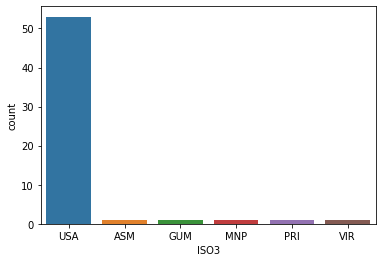

In [27]:
sns.countplot(x='ISO3', data=df)

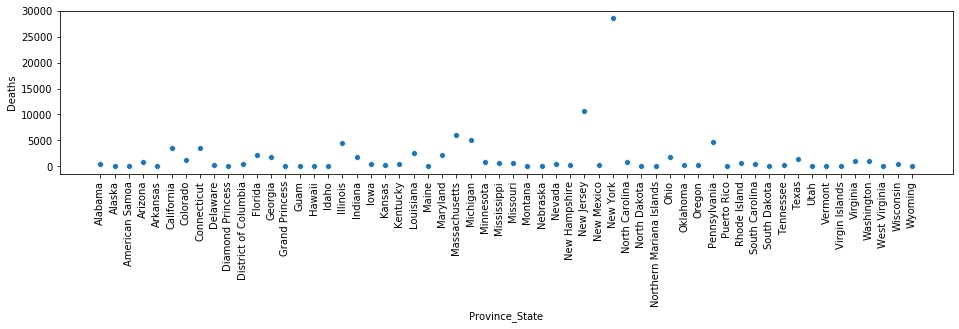

In [28]:

plt.figure(figsize=(16,3))
plt.xticks(rotation='vertical')
sns.scatterplot(x='Province_State',y='Deaths',data=df)

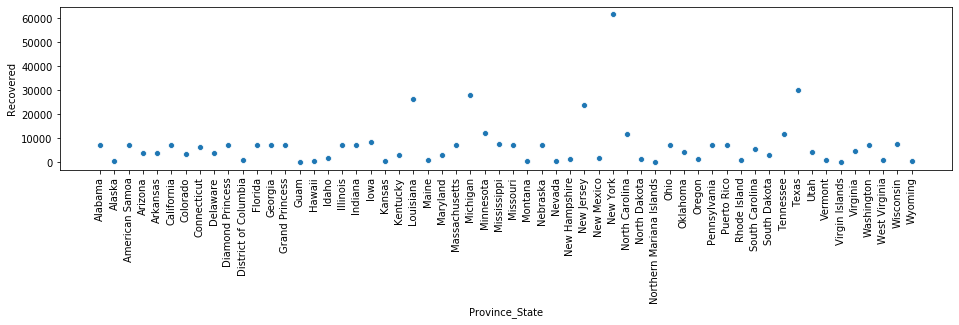

In [29]:

plt.figure(figsize=(16,3))
plt.xticks(rotation='vertical')
sns.scatterplot(x='Province_State',y='Recovered',data=df)

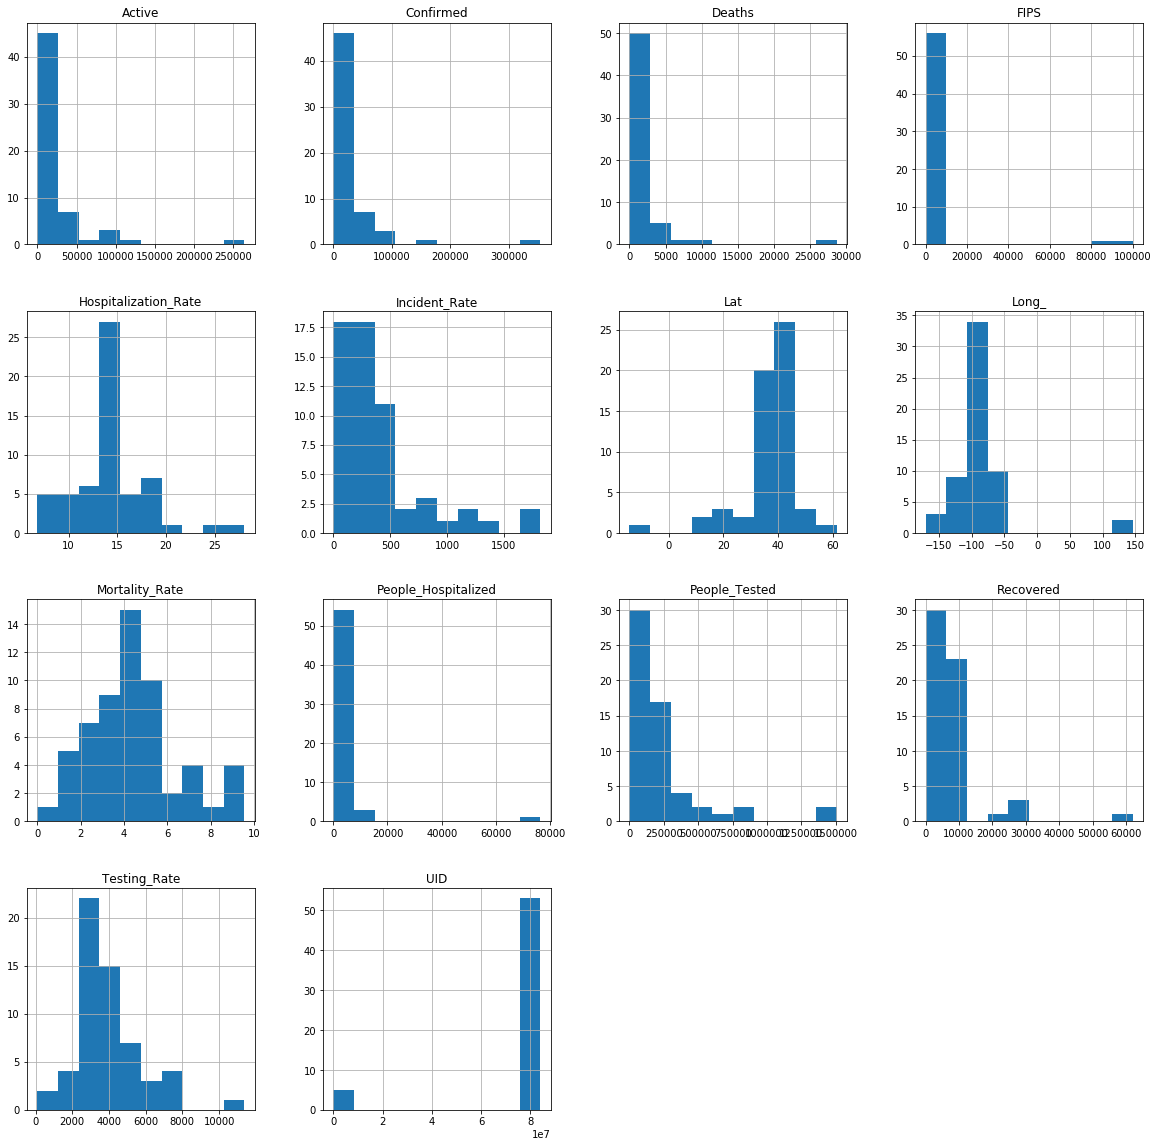

In [30]:
df.hist(figsize=(20,20))
plt.show()

Observation:
    1. Several distributions are right-skewed (e.g. Incident_Rate,People_Tested ).
    2. Mortality_Rate and Testing_Rate distribution is a slightly right-skewed normal distribution.
    3. FIPS and UID are constant values for approx all cases. They're likely to be redundant features.

In [31]:
df[df['FIPS']<100].sort_values(by='FIPS', ascending=False).head(5)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
52,Virgin Islands,18.3358,-64.8963,69,6,61.000000,2.0,78,64.324869,1383.0,4897.454545,8.695652,850,VIR,1289.294104,14.342541
44,Puerto Rico,18.2208,-66.5901,2866,125,7007.428571,2741.0,72,97.702058,2866.0,4897.454545,4.361479,630,PRI,97.702058,14.342541
39,Northern Mariana Islands,15.0979,145.6739,21,2,13.000000,6.0,69,38.082112,3817.0,4897.454545,9.523810,580,MNP,6921.877267,14.342541
14,Guam,13.4443,144.7937,154,5,125.000000,24.0,66,93.771502,4972.0,4897.454545,3.246753,316,GUM,3027.479921,14.342541
2,American Samoa,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,ASM,222.857246,14.342541


In [32]:
# Since FIPS is a unique value assigned to each province_state, we can drop it.
df.drop(columns='FIPS', axis=1, inplace=True)

In [33]:
df[df['Deaths']>10000]

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
34,New Jersey,40.2989,-74.5210,150776,10749,23945.0,116082.0,1697.509285,531343.0,4897.454545,7.129119,84000034,USA,5982.117023,14.342541
36,New York,42.1657,-74.9481,354370,28636,61886.0,263848.0,1821.620216,1505836.0,76410.000000,8.080819,84000036,USA,7740.670204,21.562209


In [34]:
df[df['People_Hospitalized']>40000]

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
36,New York,42.1657,-74.9481,354370,28636,61886.0,263848.0,1821.620216,1505836.0,76410.0,8.080819,84000036,USA,7740.670204,21.562209


In [35]:
df.drop(columns=['Lat', 'Long_'], axis=1, inplace=True)

### Check skewness distribution

In [36]:
df.skew()

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

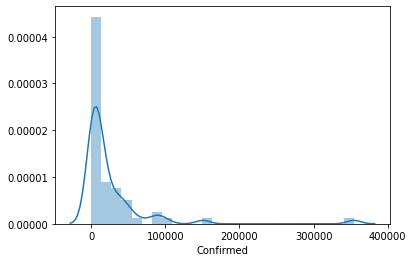

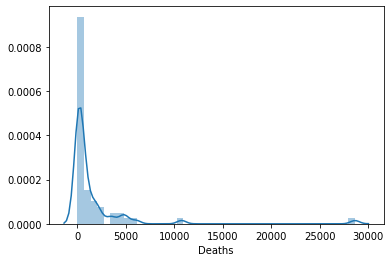

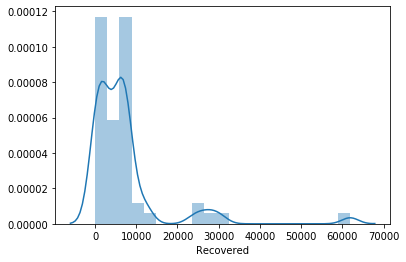

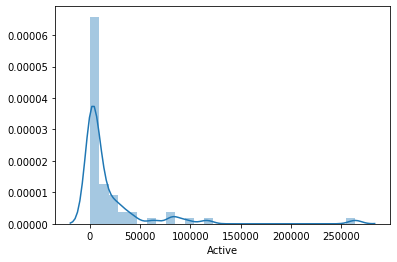

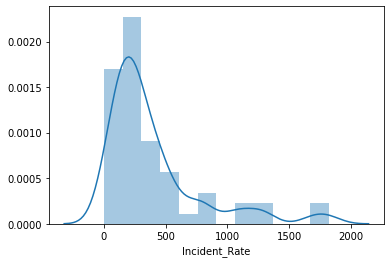

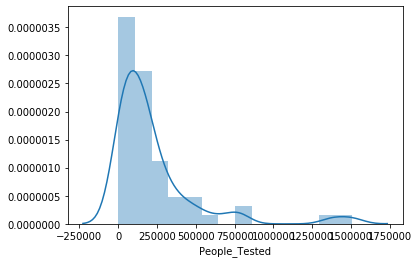

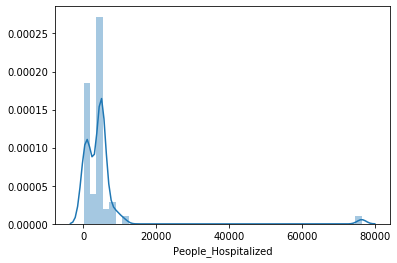

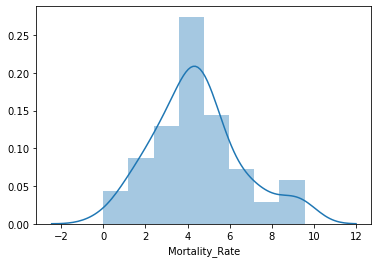

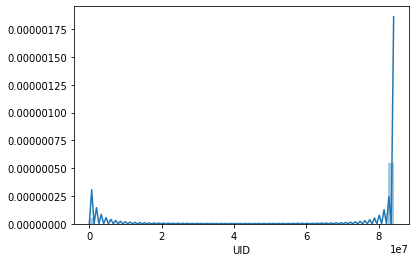

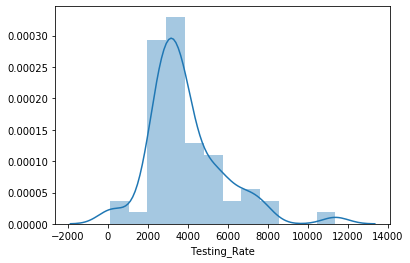

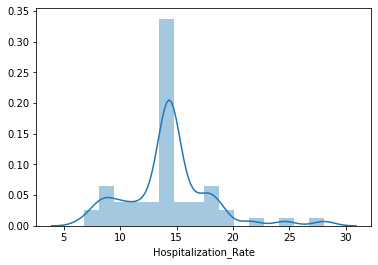

In [37]:
#Distribution plot for all numeric columns including target columns
#In for loop we give describe() function to descriminate numeric columns from categorical columns.
#Because describe() function give the summary of numeric columns
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

In [38]:
#Lets treat the skewness
import numpy as np
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [39]:
#Again check skewness
df.skew()

Confirmed               1.901107
Deaths                  2.496421
Recovered               1.431056
Active                  1.818910
Incident_Rate           0.924150
People_Tested           1.182962
People_Hospitalized     3.148527
Mortality_Rate          0.496115
UID                    -3.027680
Testing_Rate           -0.261124
Hospitalization_Rate    0.211792
dtype: float64

## Plotting Outliers

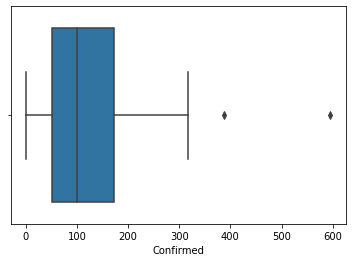

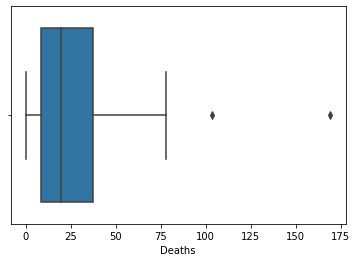

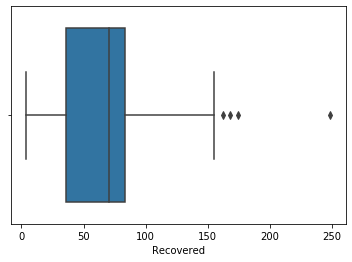

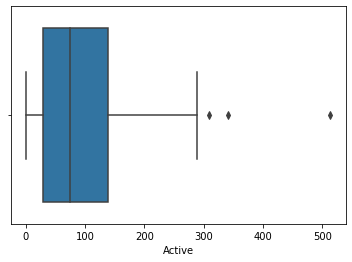

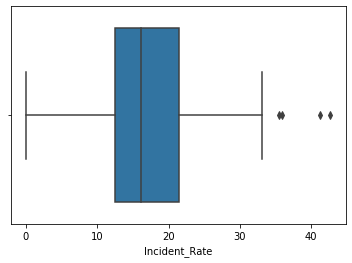

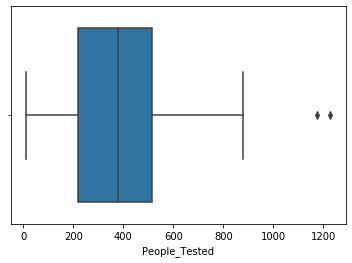

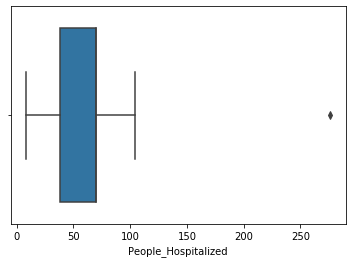

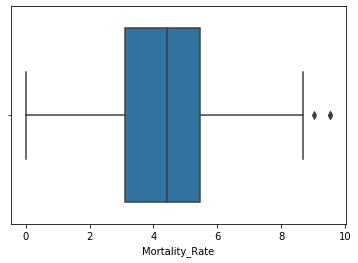

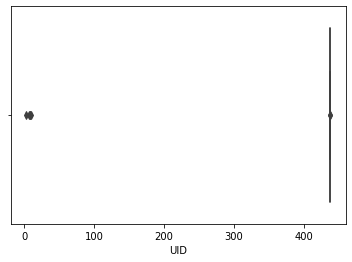

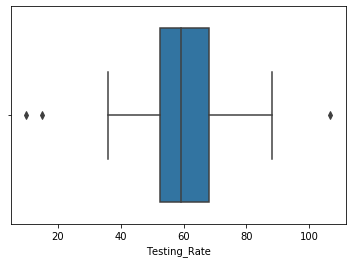

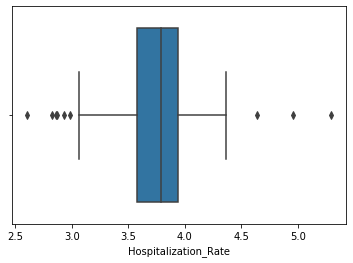

In [41]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

### Removing outliers

In [43]:
print(df.columns)
print(df.shape)

Index(['Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')
(58, 13)


In [44]:
#seprate the categorical columns and numerical columns
cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df >>> \n',cat_df,'\nnum_df >>> \n',num_df)

cat_df >>> 
 ['Province_State', 'ISO3'] 
num_df >>> 
 ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'Testing_Rate', 'Hospitalization_Rate']


In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[9.29654060e-02, 1.65723943e-01, 2.90041995e-01, 1.11201842e-01,
        1.85359224e-01, 5.61394408e-03, 5.39348860e-01, 2.18727182e-01,
        3.07090457e-01, 1.63244684e-01, 7.62849583e-01],
       [9.77608586e-01, 8.42674726e-01, 1.15999637e+00, 9.51328627e-01,
        1.21400590e+00, 8.46327095e-01, 2.92274394e-01, 9.36418161e-01,
        3.07090471e-01, 6.90911945e-01, 6.48736552e-02],
       [1.16562490e+00, 9.51422596e-01, 2.90041995e-01, 1.01410982e+00,
        2.06859362e+00, 1.57143551e+00, 2.92274394e-01, 4.23371775e-16,
        3.29394091e+00, 2.93463679e+00, 6.48736552e-02],
       [1.93100807e-02, 1.15238760e-02, 2.07504744e-01, 1.04125448e-02,
        4.16791093e-01, 1.04630441e-02, 4.41369809e-01, 2.63675605e-01,
        3.07090500e-01, 8.23372934e-01, 5.88855161e-01],
       [5.01517071e-01, 5.95699023e-01, 1.93222157e-01, 6.89286253e-01,
        5.82402298e-01, 3.75342335e-01, 9.50863723e-01, 1.10566079e+00,
        3.07090514e-01, 2.55833131e-01, 9.91810631e-

In [46]:
#consider threshold = 3
print(np.where(z>3))

(array([ 2,  5,  7, 14, 36, 36, 36, 36, 36, 36, 39, 44, 44, 52],
      dtype=int64), array([ 8,  5, 10,  8,  0,  1,  2,  3,  5,  6,  8,  8,  9,  8],
      dtype=int64))


In [47]:
df=df[(z<3).all(axis=1)]

In [48]:
df.shape

(50, 13)

8 row detect as outliers

### Macine learning Algorithm

In [50]:
#Splitting the data into input and output variable.
x=df.drop(columns=['Deaths'],axis=1)
x.head()

,Province_State,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,114.245350,83.710385,111.937483,16.315463,405.524352,38.639358,3.999387,437.951916,USA,57.913232,3.382138
1,Alaska,20.024984,18.761663,6.244998,7.403749,192.470777,69.981816,2.493766,437.951917,USA,71.161366,3.787155
3,Arizona,122.090131,61.424751,101.911727,14.310445,406.737016,42.332021,5.011405,437.951921,USA,47.674515,3.467276
4,Arkansas,70.731888,62.064483,32.310989,12.875667,310.254734,23.130067,2.138717,437.951923,USA,56.477167,3.270105
6,Colorado,150.986754,58.974571,134.238594,19.896435,363.093652,62.888791,5.698118,437.951928,USA,47.847039,4.165186


In [51]:
y=df['Deaths']
y.head()

0    22.847319
1     3.162278
3    27.331301
4    10.344080
6    36.041643
Name: Deaths, dtype: float64

In [52]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(50, 12) 		 (50,)


In [53]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in x.columns:
    if x[column].dtype==np.number:
        continue
    x[column]=le.fit_transform(x[column])

In [54]:
x.head()

,Province_State,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,114.245350,83.710385,111.937483,16.315463,405.524352,38.639358,3.999387,437.951916,0,57.913232,3.382138
1,1,20.024984,18.761663,6.244998,7.403749,192.470777,69.981816,2.493766,437.951917,0,71.161366,3.787155
3,2,122.090131,61.424751,101.911727,14.310445,406.737016,42.332021,5.011405,437.951921,0,47.674515,3.467276
4,3,70.731888,62.064483,32.310989,12.875667,310.254734,23.130067,2.138717,437.951923,0,56.477167,3.270105
6,4,150.986754,58.974571,134.238594,19.896435,363.093652,62.888791,5.698118,437.951928,0,47.847039,4.165186


In [55]:
#Scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [56]:

# Data Pre-processing
#ROC_AUC only handles binary 0,1 values. Using LabelBinarizer to convert y_test and y_pred
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('x_train.shape: ',x_train.shape,'x_test.shape: ',x_test.shape,'\ny_train.shape',y_train.shape,'y_test.shape',y_test.shape)

x_train.shape:  (35, 12) x_test.shape:  (15, 12) 
y_train.shape (35,) y_test.shape (15,)


In [62]:
#Creating function for Model Training
from sklearn.metrics import mean_squared_error, r2_score
def models(model, x_train, x_test, y_train, y_test,score,rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train,y_train))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Score:',model.score(x_train,y_train))
    print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R2 Score:',r2_score(y_test, y_pred))

In [63]:
model_name,score,rmse=[],[],[]

In [64]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
mod='Linear Regression'
print('Model Report for', mod)
models(lreg,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for Linear Regression
Score: 0.9861017183244742
RMSE: 2.486584930959636
R2 Score: 0.9913713981823237


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
#Ridge Regression
from sklearn.linear_model import Ridge
parameters={'alpha':[0.01,1,100]}
best=GridSearchCV(Ridge(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 0.01}

In [67]:
rr=Ridge(alpha=0.01)
mod='Ridge Regression'
print('Model Report for', mod)
models(rr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for Ridge Regression
Score: 0.9860775968321577
RMSE: 2.379152537711166
R2 Score: 0.9921008855178954


In [68]:
#Lasso Regression
from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,0.01,1]}
best=GridSearchCV(Lasso(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 0.01}

In [69]:
lr=Lasso(alpha=0.01)
mod='Lasso Regression'
print('Model Report for', mod)
models(lr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for Lasso Regression
Score: 0.9859882343957252
RMSE: 2.2845033193383806
R2 Score: 0.9927168807637535


In [70]:
lr=Lasso(alpha=0.001)
mod='Lasso Regression'
print('Model Report for', mod)
models(lr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for Lasso Regression
Score: 0.9861006775436244
RMSE: 2.4649115668745947
R2 Score: 0.9915211584598278


In [71]:
#Support Vector Regression
from sklearn.svm import SVR
parameters={'kernel':['linear','poly','rbf']}
best=GridSearchCV(SVR(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'kernel': 'linear'}

In [72]:
svr=SVR(kernel='linear')
mod='Support Vector Regression'
print('Model Report for', mod)
models(svr,x_train, x_test, y_train, y_test,score,rmse)
model_name.append(mod)

Model Report for Support Vector Regression
Score: 0.9458082555364639
RMSE: 8.211947372035695
R2 Score: 0.9058920857344567


In [73]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
parameters={'max_depth':[8,10,12,15],'min_samples_leaf':[100,150]}
best=GridSearchCV(DecisionTreeRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 8, 'min_samples_leaf': 100}

In [75]:
dct=DecisionTreeRegressor(max_depth=8,min_samples_leaf=100)
mod='Decision Tree Regression'
print('Model Report for', mod)
models(dct,x_train, x_test, y_train, y_test,score,rmse)
model_name.append(mod)

Model Report for Decision Tree Regression
Score: 0.0
RMSE: 28.75091696505207
R2 Score: -0.1535521528565844


In [76]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[200,300,400],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [77]:
rf=RandomForestRegressor(n_estimators=200,max_depth=5)
mod='Random Forest Regression'
print('Model Report for', mod)
models(rf,x_train, x_test, y_train, y_test,score,rmse)
model_name.append(mod)

Model Report for Random Forest Regression
Score: 0.9728022022801983
RMSE: 11.198347780219185
R2 Score: 0.8249985144846549


In [78]:
final=pd.DataFrame({'Model Name':model_name,'Score':score,'RMSE':rmse})
final

,Model Name,Score,RMSE
0,Linear Regression,0.986102,2.486585
1,Ridge Regression,0.986078,2.379153
2,Lasso Regression,0.985988,2.284503
3,Lasso Regression,0.986101,2.464912
4,Support Vector Regression,0.945808,8.211947
5,Decision Tree Regression,0.000000,28.750917
6,Decision Tree Regression,0.000000,28.750917
7,Random Forest Regression,0.972802,11.198348


In [79]:
#Export best Model
import joblib
from joblib import dump
joblib.dump(lreg,'Linear_Avocado_Dataset.pkl')

['Linear_Avocado_Dataset.pkl']